In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

### Ej1:
Dada una imagen y un valor entero: 2, 3 o 4 muestre la imagen obtenida de multiplicarla por alguno de esos valores.

In [2]:
def f1(ruta:str, factor:int): 
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    img_res = img * factor
    cv2.imshow('Original',img)
    cv2.imshow(f'Multiplicada por {factor}',img_res)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [4]:
ruta1 = 'Imagenes_para_contraste/asteroid.jpg'
f1(ruta1,3)

### Ej2 
Implementar una función que dada una imagen devuelva su negativo.

In [5]:
def f2(ruta:str): 
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    negativo = np.iinfo(img.dtype).max - img
    cv2.imshow("Negativo",negativo)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [16]:
f2(ruta1)

# Ej3 
Implementar una función que dada una imagen devuelva el histograma de niveles de gris.

In [117]:
def f3(ruta:str, mostrar:bool=False):
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    bins = np.iinfo(img.dtype).max+1 
    histogram = np.zeros(bins)
    for i in range(bins):
        for j in range(bins): 
            gris = img[i,j]
            histogram[gris] += 1
    if mostrar :
        plt.plot(histogram, color='red')
        plt.title('Histograma de Niveles de Gris')
        plt.xlabel('Nivel de Gris')
        plt.ylabel('Cantidad de Píxeles')
        plt.xlim([0,bins-1])
        plt.show()
    return histogram

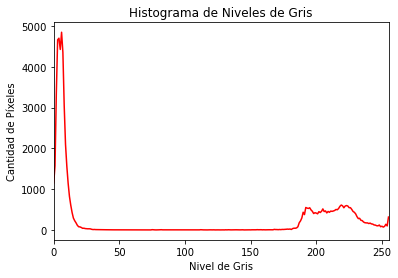

array([ 1151.,  2722.,  6075., 10738., 15441., 19868., 24717., 29069.,
       32115., 34214., 35775., 36919., 37740., 38346., 38774., 39065.,
       39290., 39464., 39578., 39656., 39730., 39790., 39830., 39872.,
       39905., 39935., 39962., 39990., 40015., 40029., 40038., 40049.,
       40057., 40065., 40072., 40079., 40085., 40090., 40092., 40094.,
       40098., 40102., 40107., 40111., 40114., 40116., 40118., 40119.,
       40121., 40123., 40124., 40125., 40129., 40129., 40131., 40135.,
       40138., 40138., 40138., 40140., 40140., 40142., 40144., 40148.,
       40149., 40150., 40151., 40152., 40152., 40153., 40155., 40157.,
       40160., 40161., 40161., 40167., 40170., 40171., 40171., 40173.,
       40175., 40178., 40183., 40185., 40187., 40187., 40187., 40190.,
       40191., 40193., 40194., 40197., 40200., 40201., 40201., 40202.,
       40203., 40203., 40205., 40206., 40208., 40209., 40210., 40213.,
       40213., 40214., 40218., 40218., 40220., 40222., 40225., 40226.,
      

In [125]:
f3(ruta1,mostrar = True).cumsum()

### Ej4
Examinando el histograma, implementar una función que devuelva una imagen que tenga aumento del contraste.

In [7]:
def f4(ruta:str):
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    

### Ej5
Implementar una función que dada una imagen y un valor de umbral devuelva una imagen binarizada.

In [8]:
def f5(ruta:str, umbral:int):
    """
    Suponemos que umbral esta en rango correspondiente.
    """
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    bin_img = (img >= umbral) * (np.iinfo(np.iinfo(img.dtype)).max+1)
    return bin_img

### Ej6 
Implementar una función que dada una imagen muestre el histograma original y el histograma
equalizado.

In [ ]:
def Fx(k): 
    res =0 
    while k>=0 : 
        res += 0.25
        k--
    return res 
def ps(y):
    if y == 0:
        return 0
    elif y == 1 or y == 2:
        return 0.5
    elif y == 3:
        return 0
    else:
        return "Valor no definido"
def Fy(k): 
    res = 0 
    while k >= 0: 
        res += ps(k)
        k--
    return res

In [54]:
arry = np.array([0,0.5,1,1])
arrx = np.array([.25,.5,.75,1])

def f(n,arry,arrx): 
    return np.argmax(arry-arrx[n]>=0)

def salida(arx, ary):
    res = np.ones(len(arx))
    for i in range(len(arx)): 
        res[i] = np.argmax(ary-arx[i]>=0)
    return res

In [64]:
[(i+1)/4 for i in range(4)]

[0.25, 0.5, 0.75, 1.0]

In [136]:
Y = [(i+1)/256 for i in range(255)]
def equalization2(arx,ary): 
    res = np.ones(len(arx))
    for i in range(len(arx)): 
        res[i] = np.argmax(ary-arx[i]>=0)
    return res
def equalization(cdf,max_val): 
    smin = cdf[0]
    hist_equ = np.floor((cdf-smin)/(1-smin) * max_val + 0.5)
    return hist_equ
def f6(ruta:str, mostrar:bool=False):
    hist_original = f3(ruta)
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    bins = np.iinfo(img.dtype).max+1
    #hist_equ = equalization(hist_original,max_val,img.size)
    N = img.size
    cdf = hist_original.cumsum() / N
    hist2 = equalization2(cdf,Y)
    #print(hist_original.size)
    if mostrar :
        plt.plot(hist2, color='red')
        plt.title('Histograma de Niveles de Gris')
        plt.xlabel('Nivel de Gris')
        plt.ylabel('Cantidad de Píxeles')
        plt.xlim([0,bins-1])
        plt.show()
    return hist2

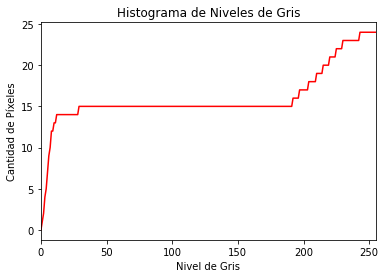

array([ 0.,  1.,  2.,  4.,  5.,  7.,  9., 10., 12., 12., 13., 13., 14.,
       14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14.,
       14., 14., 14., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15

In [137]:
f6(ruta1,mostrar=True)
#f3(ruta1)
#len(Y)

### Ej7 
Dada una imagen a la cual se le ecualizo su histograma, aplicar la ecualizacion del histograma por segunda vez a la misma imagen. Observar el resultado y dar una explicacion de lo sucedido.

In [27]:
def f7(ruta:str, mostrar:bool= False): 
    img = cv2.imread(ruta,cv2.IMREAD_GRAYSCALE)
    if img is None: 
        print("Error ruta no valida")
        exit()
    max_val = np.iinfo(img.dtype).max   
    histogram = f3(ruta)
    # primera equalizacion 
    hist_equ = equalization(histogram,max_val,img.size)
    # segunda equalization
    hist2_equa = equalization(hist_equ,max_val,img.size)
    if mostrar :
        plt.plot(hist2_equa, color='red')
        plt.title('Histograma de Niveles de Gris')
        plt.xlabel('Nivel de Gris')
        plt.ylabel('Cantidad de Píxeles')
        plt.xlim([0,max_val])
        plt.show()
    return hist2_equa

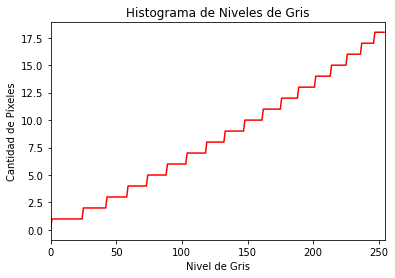

array([ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
        9.,  9.,  9.,  9.,  9., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 11., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 12., 12., 12., 12., 12

In [28]:
f7(ruta1,mostrar=True)

### Ej8 

In [135]:
img = cv2.imread(ruta1,cv2.IMREAD_GRAYSCALE)
img.size

683000